In [47]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [48]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [49]:
import zipfile
zip_extract=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_extract.extractall('/content')
zip_extract.close()

In [50]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [51]:
"""
Defining Generators

"""


train_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)


validation_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [52]:
# Normalising the values within range 0--1

def preprocessing_image(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

In [53]:
train_ds=train_ds.map(preprocessing_image)
validation_ds=validation_ds.map(preprocessing_image)

In [54]:
# Definig Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),padding='valid',strides=2))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),padding='valid',strides=2))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),padding='valid',strides=2))



In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [56]:
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [57]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [58]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [59]:
classification_cnn_model=model.fit(train_ds,validation_data=validation_ds,epochs=100,callbacks=early_stopping)

Epoch 1/100
625/625 [==============================] - 68s 103ms/step - loss: 1.4047 - accuracy: 0.5857 - val_loss: 0.6240 - val_accuracy: 0.6468
Epoch 2/100
625/625 [==============================] - 68s 108ms/step - loss: 0.6025 - accuracy: 0.6754 - val_loss: 0.7336 - val_accuracy: 0.6314


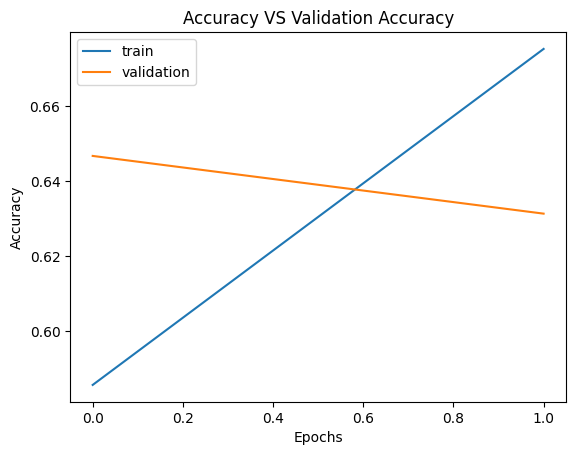

In [60]:
import matplotlib.pyplot as plt

plt.plot(classification_cnn_model.history['accuracy'],label='train')
plt.plot(classification_cnn_model.history['val_accuracy'],label='validation')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy VS Validation Accuracy")

plt.show()

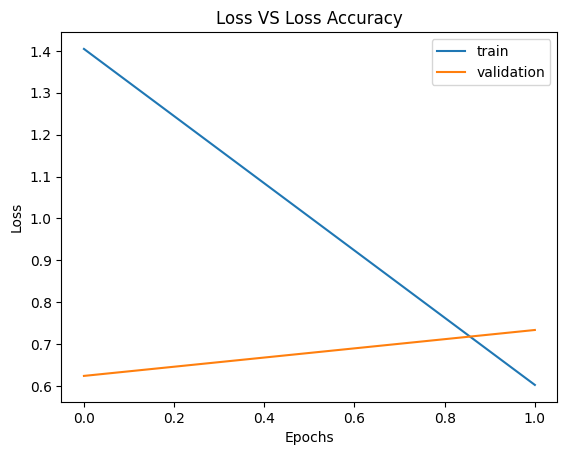

In [61]:
import matplotlib.pyplot as plt

plt.plot(classification_cnn_model.history['loss'],label='train')
plt.plot(classification_cnn_model.history['val_loss'],label='validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss VS Loss Accuracy")

plt.show()

In [62]:
import cv2

1/1 [==============================] - 0s 102ms/step


array([[0.]], dtype=float32)

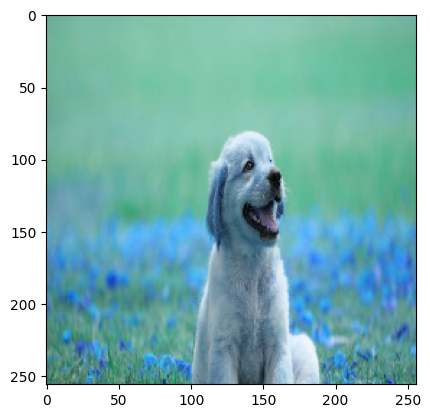

In [63]:
test_image_dog = cv2.imread('/content/dog.jpg')
test_image_dog=cv2.resize(test_image_dog,(256,256))
test_image_dog_input=test_image_dog.reshape((1,256,256,3))
plt.imshow(test_image_dog)
model.predict(test_image_dog_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

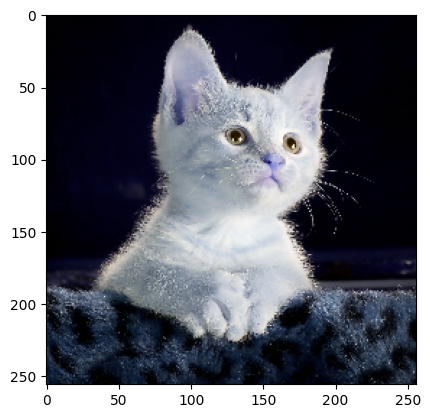

In [64]:
test_image_cat = cv2.imread('/content/cat.jpg')
test_image_cat=cv2.resize(test_image_cat,(256,256))
test_image_cat_input=test_image_cat.reshape((1,256,256,3))
plt.imshow(test_image_cat)
model.predict(test_image_cat_input)